<h3 style="text-align:center; font-weight: bold; ">
University of Memphis
</h3>
<h3 style="text-align:center; font-weight: bold;">
Center for Earthquake Research and Information (CERI)
</h3>
<h2 style="text-align:center; font-weight: bold;">
Spring Term 2025 - Global Geophysics
</h2>
<h2 style="text-align:center; font-weight: bold;">
CERI 8211
</h2>

<h1 style="text-align:center; font-weight: bold;">
Homework 3
</h1>

<h3 style="text-align:center; font-weight: bold;">
<br>Submitted by:
<br>Adonay Martinez-Coto
</h3>

In [13]:

# Libraries to use
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.integrate import solve_ivp

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['figure.titleweight'] = 'bold'

#reset the default parameters
# mpl.rcParams.update(mpl.rcParamsDefault)

## Problem 1

### Problem 1 - Part A
Referring to the population equations for foxes and rabbits given in the lecture slides, numerically compute and plot the evolution of their populations for the following conditions and parameters:
- Initial conditions: $R_0=100, F_0=100$
- Parameters (unit: days ${ }^{-1}$ ): $\beta_r=0.01, \delta_r=0.005, \beta_f=0.005, \delta_f=0.01$, and $\epsilon_r=\epsilon_f=0.0001$.

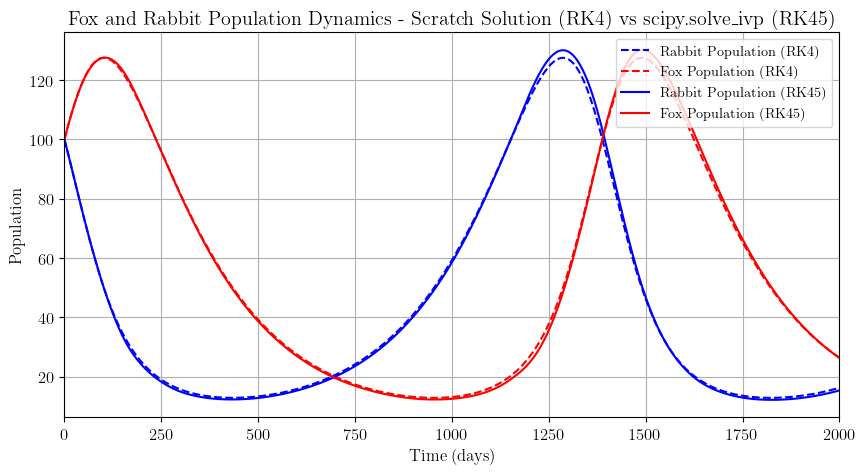

In [14]:
# Define constant parameters
beta_r = 0.01  # Rabbit birth rate
beta_f = 0.005  # Fox birth rate
delta_r = 0.005  # Rabbit death rate
delta_f = 0.01  # Fox death rate
epsilon_r = 0.0001  # Foxes eating rabbits contribution to fox growth
epsilon_f = 0.0001  # Foxes eating rabbits contribution to rabbit death

# Initial conditions
R0 = 100  # Initial rabbit population
F0 = 100  # Initial fox population

# Time settings
dt = 0.1  # Time step in days
T = 2000  # Total time in days
n_steps = int(T / dt)  # Number of time steps

def predator_prey(t, y):
    R, F = y
    dR_dt = beta_r * R - delta_r * R - epsilon_f * F * R
    dF_dt = beta_f * F - delta_f * F + epsilon_r * F * R
    return [dR_dt, dF_dt]

def runge_kutta4(f, y0, t):
    """ Fourth-order Runge-Kutta method to solve a system of ODEs programmed from scratch"""
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        h = t[i] - t[i - 1]
        k1 = np.array(f(t[i - 1], y[i - 1]))
        k2 = np.array(f(t[i - 1] + h / 2, y[i - 1] + h * k1 / 2))
        k3 = np.array(f(t[i - 1] + h / 2, y[i - 1] + h * k2 / 2))
        k4 = np.array(f(t[i - 1] + h, y[i - 1] + h * k3))
        y[i] = y[i - 1] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

# Solve using Runge-Kutta method programmed from scratch
time = np.linspace(0, T, n_steps)
y_rk4 = runge_kutta4(predator_prey, [R0, F0], time)

# Solve using solve_ivp
sol = solve_ivp(predator_prey, [0, T], [R0, F0], method='RK45', t_eval=time)

plt.figure(figsize=(10, 5))
plt.plot(time, y_rk4[:, 0], label='Rabbit Population (RK4)', color='blue', linestyle='dashed')
plt.plot(time, y_rk4[:, 1], label='Fox Population (RK4)', color='red', linestyle='dashed')
plt.plot(sol.t, sol.y[0], label='Rabbit Population (RK45)', color='blue')
plt.plot(sol.t, sol.y[1], label='Fox Population (RK45)', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Fox and Rabbit Population Dynamics - Scratch Solution (RK4) vs scipy.solve_ivp (RK45)')
plt.legend(loc='upper right', fontsize='small')
plt.xlim(0, T)
plt.grid()
plt.show()

### Problem 1 - Part B

Assume that for a spherical drop of water, the evaporation rate is proportional to the surface area of the drop. Write a differential equation for the radius of the drop as a function of time. What are the units of the proportionality constant that you had to use? Also, solve the equation.


### Analytical Solution

For a sphere of radius $r$, the volume $V$ is given by:  $ V = \frac{4}{3} \pi r^3$.
The surface area $A$ is: $ A = 4 \pi r^2$.

The evaporation rate is proportional to the surface area, but what is changing with the evaporation is the volume, so we can write:
$$\frac{dV}{dt} = -k A$$
where $k$ is the proportionality constant, that in this case is negative because the volume is decreasing.

Now we can substitute the expressions for $V$ and $A$ in the equation:

$$\frac{d}{dt}\left(\frac{4}{3} \pi r^3\right) = -k \left(4 \pi r^2\right)$$

Using the chain rule, that states that $\frac{d}{dt}f(r) = \frac{df}{dr}\frac{dr}{dt}$, we can write:

$$\frac{d}{dt}\left(\frac{4}{3} \pi r^3\right) = \frac{d}{dr}\left(\frac{4}{3} \pi r^3\right)\frac{dr}{dt} = 4 \pi r^2 \frac{dr}{dt} \quad \rightarrow \quad 4 \pi r^2 \frac{dr}{dt} = -k \left(4 \pi r^2\right)$$
$$\frac{dr}{dt} = -k$$

Then we integrate both sides of the equation from $t=0$ to $t=t$ and from $r_0$ to $r$ respectively:

$$\int_{r_0}^{r} dr = -k \int_{0}^{t} dt$$
$$r - r_0 =  -kt$$
$$r = r_0 - kt$$
where $r_0$ is the initial radius of the drop.

*Units of the Proportionality Constant*

Since generally the size of a spherical drop is given in mm, the radius $r$ is in mm, and the time $t$ is in seconds, the units of the proportionality constant $k$ must be such that the units of $kt$ are also in mm. Thus, the units of $k$ are mm/s.

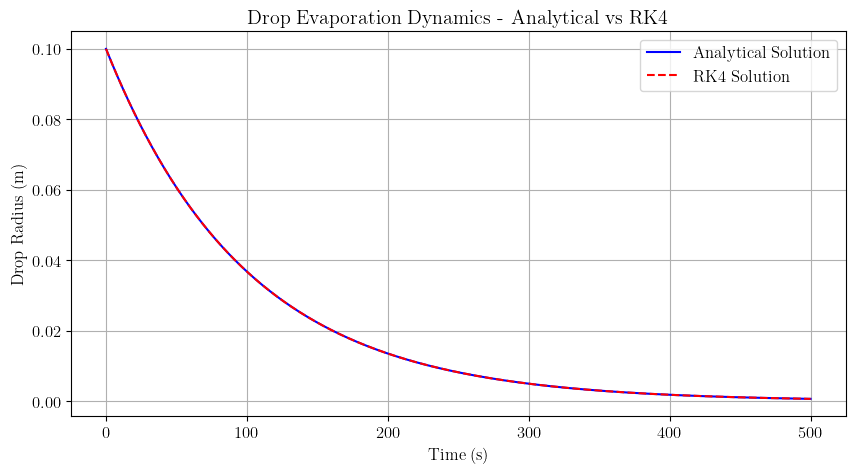

In [15]:
# Define parameters
k = 0.01  # Evaporation rate constant
r0 = 0.1  # Initial radius of the droplet
T = 500  # Total time for evaporation 

def evaporation_eq(t, r):
    """Evaporation rate equation"""
    return -k * r

# analytical solution
r_analytical = r0 * np.exp(-k * np.linspace(0, T, 1000))

# Time discretization
time = np.linspace(0, T, 1000)
# Solve using Runge-Kutta method programmed from scratch
y_rk4 = runge_kutta4(evaporation_eq, [r0], time)

# plotting
plt.figure(figsize=(10, 5))
plt.plot(time, r_analytical, label='Analytical Solution', color='blue')
plt.plot(time, y_rk4[:, 0], label='RK4 Solution', color='red', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Drop Radius (m)')
plt.title('Drop Evaporation Dynamics - Analytical vs RK4')
plt.legend()
plt.grid()
plt.show()


### Problem 1 - Part C

A lake has a constant volume of $10^6 \mathrm{~m}^3$ and a constant surface area of $6 \times 10^4 \mathrm{~m}^2$. Water flows into the lake at an average rate of $0.005 \mathrm{~m}^3 / \mathrm{s}$. The amount of water that evaporates yearly from the lake is equivalent in volume to the lake's top meter of water. Initially, the lake water is pristine, but at a certain time a soluble, non-codistilling (jargon for "it does not evaporate but does flow away if the water flows away") pollutant is discharged into the lake at a steady rate of 40 tons/year ( 1 ton $=10^3 \mathrm{~kg}$ ). Derive a formula for the concentration of pollutant in the lake as a function of time. How much pollutant will the lake contain as time approaches infinity? Plot this function.

The problem gives us the following information:

- Volume of the lake: $V=10^6 \mathrm{~m}^3 = 10^6 tons$ ( since $1 \ m^3$ of water is approximately 1 tonne)
- Surface area of the lake: $A=6 \times 10^4 \mathrm{~m}^2$
- Inflow rate of water: $F_{inwater}=0.005 \mathrm{~m}^3 / \mathrm{s} =  157 680 \ tons / \mathrm{year}$ 
- Evaporation rate of water: $F_{evap}= 1 \ m / \mathrm{year}$
- Discharge rate of pollutant: $F_{p}=40 \mathrm{~tons} / \mathrm{year}$
- Initial concentration of pollutant in the lake: $C_0=0 \mathrm{~tons} / \mathrm{m}^3$

### Analytical Solution
The concentration of pollutant in the lake is given by the ratio of the amount of pollutant in the lake to the volume, but since the volume is constant, we can write:

$$C(t) = \frac{P(t)}{V}$$

where $C(t)$ is the concentration of pollutant in the lake at time $t$, and $P(t)$ is the amount of pollutant in the lake at time $t$.

Since the volumen is constant, it means that the inflow rate of water is equal to the outflow rate of water (this could be through a stream or groundwater flow), so we can write:
\begin{align*}
F_{inwater} &= F_{outwater} + F_{evap} \\
F_{outwater} &= F_{inwater} - F_{evap}
\end{align*}
Substituting the values given in the problem, we get:
\begin{align*}
F_{outwater} &= 157 680 \mathrm{~tons} / \mathrm{year} - (1 m \times 6 \times 10^4 \mathrm{~m}^2) \\
&= 157 680 \mathrm{~tons} / \mathrm{year} - 60 000 \mathrm{~tons} / \mathrm{year} \\
&= 97 680 \mathrm{~tons} / \mathrm{year}
\end{align*}

Now we can write the differential equation for the amount of pollutant it will be the flow of polluntant in minus the flow of pollutant out, where the flow of pollutant out is the concentration of pollutant times the outflow rate, in this case since the pollutant does not evaporate, the outflow rate should be the outflow rate of water:

$$\frac{dP}{dt} = F_{p} - C(t) F_{outwater}$$

Substituting the expression for $C(t)$, we get:
$$\frac{dP}{dt} = F_{p} - \frac{P(t)}{V} F_{outwater}$$
$$\frac{dP}{dt} = F_{p} - \frac{P(t)}{10^6} (97 680)$$
$$\frac{dP}{dt} = 40 - 0.09768 P(t)$$

This is a first-order linear differential equation, that can be solved using the integrating factor method. This method states that for a first-order linear differential equation of the form:
$\frac{dy}{dt} + p(t) y = g(t)$ the solution is given by: $y(t) = e^{-\int p(t) dt} \left( \int g(t) e^{\int p(t) dt} dt + C \right)$

In our case, we have:

$$\frac{dP}{dt} + 0.09768 P(t) = 40$$

where $p(t) = 0.09768$ and $g(t) = 40$.

so we can write:

$$P(t) = e^{-\int 0.09768 dt} \left( \int 40 e^{\int 0.09768 dt} dt + C \right)$$

$$P(t) = e^{-0.09768 t} \left( \int 40 e^{0.09768 t} dt + C \right)$$

Now we can solve the integral:

$$\int 40 e^{0.09768 t} dt = \frac{40}{0.09768} e^{0.09768 t} + C_1$$

Substituting this back into the equation, we get:

$$P(t) = e^{-0.09768 t} \left( \frac{40}{0.09768} e^{0.09768 t} + C_1 \right)$$

$$P(t) = \frac{40}{0.09768} + C_1 e^{-0.09768 t}$$

Now we can use the initial condition $P(0) = 0$ to find the value of $C_1$:

$$0 = \frac{40}{0.09768} + C_1 e^{-0.09768 \cdot 0}$$
$$C_1 = -\frac{40}{0.09768}$$
Substituting this back into the equation, we get:
$$P(t) = \frac{40}{0.09768} - \frac{40}{0.09768} e^{-0.09768 t}$$
$$P(t) = \frac{40}{0.09768} (1 - e^{-0.09768 t})$$
$$P(t) \approx 409.5 (1 - e^{-0.09768 t})$$
This is the expression for the amount of pollutant in the lake as a function of time.

Now we can substitute this expression for $P(t)$ into the expression for $C(t)$:

$$C(t) = \frac{P(t)}{V} = \frac{40}{0.09768} \frac{1 - e^{-0.09768 t}}{10^6}$$
$$C(t) \approx 0.0004095 (1 - e^{-0.09768 t})$$

This is the expression for the concentration of pollutant in the lake as a function of time.

*When time approaches infinity*
As time approaches infinity, the term $e^{-0.09768 t}$ approaches 0, so we can write:
$$C(\infty) = \frac{40}{0.09768} \frac{1}{10^6} \approx 0.0004095$$
This is the concentration of pollutant in the lake as time approaches infinity, but the amount of pollutant in the lake will be:
$$P(\infty) = \frac{40}{0.09768} \approx 409.5 \mathrm{~tons}$$


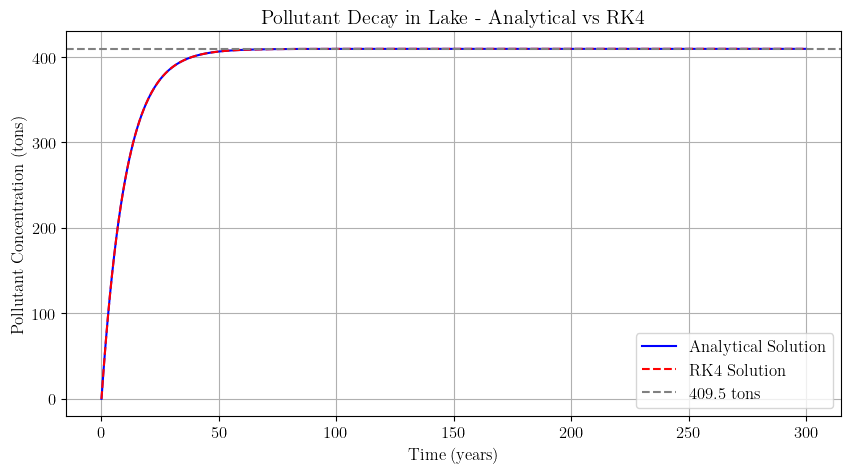

In [16]:
# Given constants
V = 1e6  # Volume of lake (tons)
F_p = 40  # Pollutant discharge rate (tons/year)
F_outwater = 97680  # Outflow rate of water (tons/year)
k = F_outwater / V  # Decay factor

# Analytical solution function
def analytical_solution(t):
    return (F_p / k) * (1 - np.exp(-k * t))

def pollutant_decay(t, P):
    """ODE for pollutant decay in the lake"""
    return F_p - k * P

# Time discretization
time = np.linspace(0, 300, 1000)  # 100 years
# Solve using Runge-Kutta method programmed from scratch
y_rk4 = runge_kutta4(pollutant_decay, [0], time)
# Analytical solution
P_analytical = analytical_solution(time)
# plotting
plt.figure(figsize=(10, 5))
plt.plot(time, P_analytical, label='Analytical Solution', color='blue')
plt.plot(time, y_rk4[:, 0], label='RK4 Solution', color='red', linestyle='dashed')
plt.axhline(y=F_p / k, color='gray', linestyle='--', label='409.5 tons')
plt.xlabel('Time (years)')
plt.ylabel('Pollutant Concentration (tons)')
plt.title('Pollutant Decay in Lake - Analytical vs RK4')
plt.legend()
plt.grid()
plt.show()

## Problem 2
- Draw the concordia for the $\mathrm{U}-\mathrm{Pb}$ system.
- Plot the U-Pb isotope data for a zircon grain given in Table 1 on your concordia and infer the mineral's formation age. The measurement errors need not be considered.

\begin{aligned}
&\begin{array}{ccc}
\hline \text { Number } & { }^{206} \mathrm{~Pb} /{ }^{238} \mathrm{U}(\mathrm{Myr}) & { }^{207} \mathrm{~Pb} /{ }^{235} \mathrm{U}(\mathrm{Myr}) \\
\hline 1 & 4,233 \pm 61 & 4,321 \pm 20 \\
2 & 4,201 \pm 59 & 4,303 \pm 20 \\
3 & 3,780 \pm 55 & 4,153 \pm 20 \\
4 & 1,713 \pm 29 & 3,155 \pm 19 \\
5 & 2,595 \pm 41 & 3,672 \pm 20 \\
6 & 1,177 \pm 21 & 2,808 \pm 20 \\
7 & 4,356 \pm 60 & 4,355 \pm 19 \\
8 & 4,235 \pm 59 & 4,307 \pm 19 \\
9 & 3,674 \pm 53 & 4,078 \pm 20 \\
10 & 4,126 \pm 58 & 4,287 \pm 19 \\
11 & 2,604 \pm 40 & 3,651 \pm 19 \\
12 & 1,961 \pm 32 & 3,317 \pm 19 \\
13 & 4,364 \pm 61 & 4,392 \pm 20 \\
14 & 3,355 \pm 49 & 3,985 \pm 19 \\
\hline
\end{array}\\
&\text { Table 1: SHRIMP U-Pb isotopic analytical data }
\end{aligned}

Age of the Sample: 4355.71 Ma


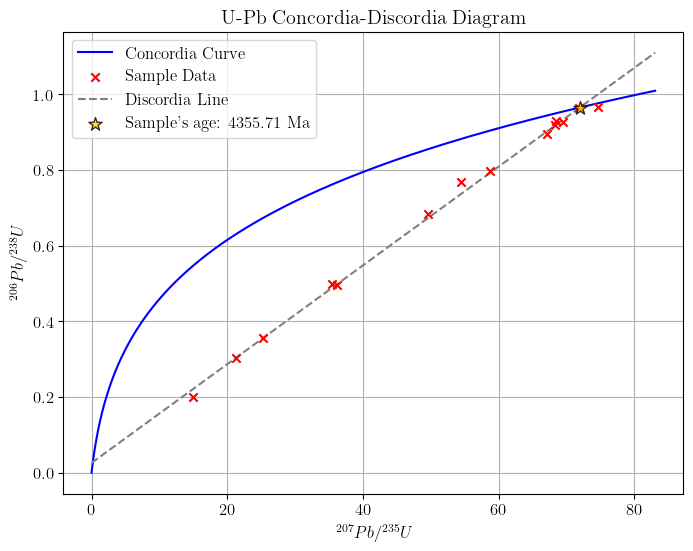

In [17]:
# Decay constants (1/yr)
λ235 = 9.8485e-10  # 235U
λ238 = 1.55125e-10  # 238U

# Define function to calculate concordia curve
def concordia(t):
    """ Returns 206Pb/238U and 207Pb/235U ratios for given age (t in years) """
    Pb206_U238 = np.exp(λ238 * t) - 1
    Pb207_U235 = np.exp(λ235 * t) - 1
    return Pb206_U238, Pb207_U235

# Generate Concordia Curve
t_values = np.linspace(0, 4500e6, 500)  # Time range from 0 to 4.5 Ga
Pb206_U238_vals, Pb207_U235_vals = concordia(t_values)

# SHRIMP U-Pb zircon data from table 1
zircon_Pb206_U238_t = np.array([4233, 4201, 3780, 1713, 2595, 1177, 4356, 4235, 3674, 4126, 2604, 1961, 4364, 3355])
zircon_Pb207_U235_t = np.array([4321, 4303, 4153, 3155, 3672, 2808, 4355, 4307, 4078, 4287, 3651, 3317, 4392, 3985])
zircon_Pb206_U238_t = zircon_Pb206_U238_t * 1e6  # Convert to years
zircon_Pb207_U235_t = zircon_Pb207_U235_t * 1e6 

# Convert ages to isotope ratios
Pb206_U238_data, Pb207_U235_data = concordia(zircon_Pb206_U238_t)[0], concordia(zircon_Pb207_U235_t)[1]

# Fit a line for discordia
params = np.polyfit(Pb207_U235_data, Pb206_U238_data, 1)
slope = params[0]
intercept = params[1]

# Finding the intersection point 
# since I will do that the line will use the same Pb207_U235 values as the concordia curve
# I can find the intersection point by finding the value of Pb207_U235 where the difference between the discordia and concordia is minimum
discordia = slope * Pb207_U235_vals + intercept
diff = np.abs(discordia - Pb206_U238_vals).sort()
intersection_idx = np.argwhere(np.abs(discordia - Pb206_U238_vals) < 1e-3)
rate_x = np.max(Pb207_U235_vals[intersection_idx])
t_concordia = np.log(1 + rate_x) / λ235
print(f"Age of the Sample: {t_concordia/1e6:.2f} Ma")


plt.figure(figsize=(8, 6))
plt.plot(Pb207_U235_vals,Pb206_U238_vals,  label="Concordia Curve", color="blue")                       # Plot Concordia Curve
plt.scatter(Pb207_U235_data, Pb206_U238_data, color="red", label="Sample Data", zorder=3, marker="x")   # Plot Sample Data
plt.plot(Pb207_U235_vals, discordia, label="Discordia Line", color="gray", linestyle="--")              # Plot Discordia Line
plt.scatter(rate_x, slope * rate_x + intercept,                                                         # Plot Intersection Point for Age
            label=f'Sample\'s age: {t_concordia/1e6:.2f} Ma', 
            color="gold", zorder=3, marker="*", s=100, edgecolors="black", alpha=0.8) 
plt.xlabel(r"$^{207}Pb/^{235}U$")
plt.ylabel(r"$^{206}Pb/^{238}U$")
plt.title("U-Pb Concordia-Discordia Diagram")
plt.legend()
plt.grid(True)
plt.show()

# Problem 3
Fission-track dating was performed on two minerals in a sample. The track date from garnet was 700 Ma and the date from muscovite was 540 Ma .
- Determine the cooling rate for these minerals in ${ }^{\circ} \mathrm{C} \mathrm{Ma}^{-1}$.
- Determine the closure temperatures for these minerals.
- Assuming that cooling continued at this rate, calculate the track date that would be given by apatite and its closure temperature.
- Would a biotite fission-trak date be useful?

Cooling rate for a mineral can be expressed as:
$$\text{cooling rate} = \frac{\Delta T}{\Delta t} = \frac{T_{C,B} - T_{C,A}}{t_{ft,B} - t_{ft,A}}$$
where $T_{C,A}$ and $T_{C,B}$ are the closure temperatures for the minerals A and B, and $t_{ft,A}$ and $t_{ft,B}$ are the fission-track dates for the minerals A and B.

From the following image, from Fowler [2005], we can select a any cooling rate, because we can see that $\Delta T$ is the same along the line for these two minerals, so we can select any point along the line, for example 0.1 ${ }^{\circ} \mathrm{C} \mathrm{Ma}^{-1}$. 

<p align="center">
  <img src="fisiontrack.png"  width="500"/>
</p>

With a selected cooling rate of 0.1 ${ }^{\circ} \mathrm{C} \mathrm{Ma}^{-1}$, we can directly see in the plot that for the garnet, the closure temperature is 255 ${ }^{\circ} \mathrm{C}$, and for the muscovite, the closure temperature is 105 ${ }^{\circ} \mathrm{C}$.
Now we can substitute these values in the equation for the cooling rate:

$$\text{cooling rate} = \frac{T_{C,B} - T_{C,A}}{t_{ft,B} - t_{ft,A}} = \frac{255 - 105}{700 - 540} = \frac{150}{160} = 0.9375 \mathrm{~C} \mathrm{Ma}^{-1}$$

Then using the same plot image we find the most approximate closure temperature for each one:

<p align="center">
  <img src="fisiontrack23.png"  width="500"/>
</p>

For the garnet, the closure temperature is 280 ${ }^{\circ} \mathrm{C}$, and for the muscovite, the closure temperature is 125 ${ }^{\circ} \mathrm{C}$.


Then fo knowing the closure temperature for the apatite, we can use the same plot image, and we can see that the closure temperature for the apatite at the cooling rate of 0.9375 ${ }^{\circ} \mathrm{C} \mathrm{Ma}^{-1}$  is approximately 65 ${ }^{\circ} \mathrm{C}$.

Then with this information we can calculate the fission-track date for the apatite, using the same equation for the cooling rate:

$$t_{ft,apatite} = \frac{T_{C,muscovite} - T_{C,apatite}}{\text{cooling rate}} + t_{ft,muscovite}$$
$$t_{ft,apatite} = \frac{125 - 65}{0.9375} + 540 = 64 + 540 = 604 \mathrm{~Ma}$$

Finally, for the biotite fission-track date, we can see in the plot that its closure temperature is really low, under the 100 ${ }^{\circ} \mathrm{C}$, so it would not be useful for this case, because since the closure temperature is low the biotite fission-track date would be better for much younger samples.

## Problem 4
Six samples of granodiorite from a pluton in British Columbia, Canada, have Sr and Rb isotopic compositions as in Table 2.
- Find the age of the intrusion.
- Find the initial ${ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr}$ ratio of the magma at the time of the intrusion.
- Assuming an ${ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr}$ ratio of 0.699 and an ${ }^{87} \mathrm{Rb} /{ }^{86} \mathrm{Sr}$ ratio of 0.1 for the undifferentiated Earth 4550 Ma ago, comment on the possibility that this batholith originated in the mantle.

\begin{aligned}
&\begin{array}{cc}
\hline{ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr} & { }^{87} \mathrm{Rb} /{ }^{86} \mathrm{Sr} \\
\hline 0.7117 & 3.65 \\
0.7095 & 1.80 \\
0.7092 & 1.48 \\
0.7083 & 0.82 \\
0.7083 & 0.66 \\
0.7082 & 0.74 \\
\hline
\end{array}\\
\text { Table 2: } &\mathrm{Rb}-\mathrm{Sr} \text { isotopic analytical data }
\end{aligned}

The equation of the $\mathrm{Rb}-\mathrm{Sr}$ isochron is given by: 

$$\left[\frac{{ }^{87} \mathrm{Sr}}{{ }^{86} \mathrm{Sr}}\right]_{\text {now }}=\left[\frac{{ }^{87} \mathrm{Sr}}{{ }^{86} \mathrm{Sr}}\right]_0+\left[\frac{{ }^{87} \mathrm{Rb}}{{ }^{86} \mathrm{Sr}}\right]_{\text {now }}\left(\mathrm{e}^{\lambda t}-1\right)$$

Where $\lambda$ is the decay constant of ${ }^{87} \mathrm{Rb}$, $t$ is the age of the intrusion, and $\left[\frac{{ }^{87} \mathrm{Sr}}{{ }^{86} \mathrm{Sr}}\right]_0$ is the initial, $\left[\frac{{ }^{87} \mathrm{Sr}}{{ }^{86} \mathrm{Sr}}\right]_{\text {now }}$ is the present measured ${ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr}$ ratio of the sample.

Slope (e^(lambda * t) - 1): 0.00118
Initial 87Sr/86Sr ratio: 0.70741
Estimated Age of Intrusion: 82.79 Ma


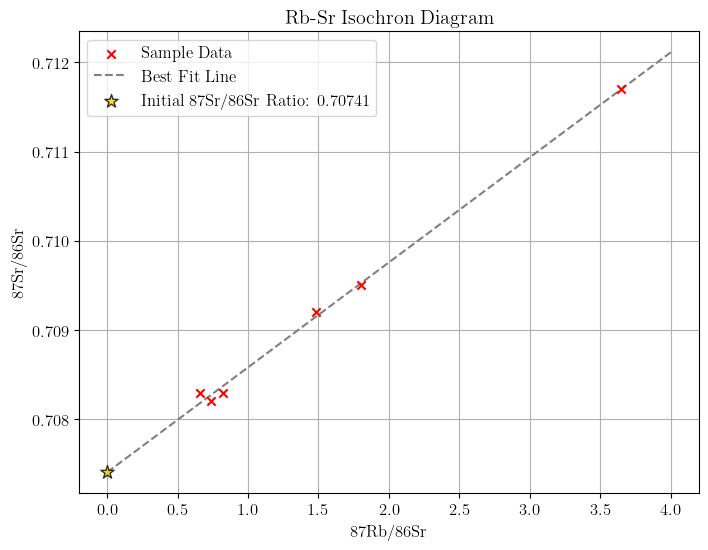

In [18]:
# Decay constant for Rb
lambda_Rb = 1.42e-11  # yr^-1

# Given data from Table 2
Rb_Sr_ratio = np.array([3.65, 1.80, 1.48, 0.82, 0.66, 0.74])
Sr_ratio = np.array([0.7117, 0.7095, 0.7092, 0.7083, 0.7083, 0.7082])

# Fit a line to the data
params = np.polyfit(Rb_Sr_ratio, Sr_ratio, 1)
slope = params[0]
intercept = params[1]

# Calculate age
t_age = np.log(slope + 1) / lambda_Rb

# Print results
print(f"Slope (e^(lambda * t) - 1): {slope:.5f}")
print(f"Initial 87Sr/86Sr ratio: {intercept:.5f}")
print(f"Estimated Age of Intrusion: {t_age / 1e6:.2f} Ma")

# Plot Isochron Diagram
isocron = slope * np.linspace(0, 4, 100) + intercept
plt.figure(figsize=(8, 6))
plt.scatter(Rb_Sr_ratio, Sr_ratio, label='Sample Data', color='red', zorder=3, marker='x')
plt.plot(np.linspace(0, 4, 100), isocron, label='Best Fit Line', color='gray', linestyle='--')
plt.scatter(0, intercept, label=f'Initial 87Sr/86Sr Ratio: {intercept:.5f}', color='gold', zorder=3, marker='*', s=100, edgecolors='black', alpha=0.8)
plt.xlabel("87Rb/86Sr")
plt.ylabel("87Sr/86Sr")
plt.title("Rb-Sr Isochron Diagram")
plt.legend()
plt.grid()
plt.show()

For this exercise we are assuming that the initial ${ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr}$ ratio for undifferentiated Earth is 0.699 and Fowler [2005] also mentioned that for rocks mantle-derived the initial ${ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr}$ is between 0.699 and 0.704, from our results we can see that the initial ${ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr}$ ratio is 0.70741, that is slightly higher than the maximum value for mantle-derived rocks, so we can conclude that this batholith did not originate in the mantle because the initial ${ }^{87} \mathrm{Sr} /{ }^{86} \mathrm{Sr}$ more consistent with a crustal origin. 

### Some References used when solving the problems
- Brunton, S. (2022, December 19). *Coding a fourth-order Runge-Kutta integrator in Python and Matlab* [Video]. YouTube. [https://www.youtube.com/watch?v=vNoFdtcPFdk](https://www.youtube.com/watch?v=vNoFdtcPFdk)
- [Best fit for a straight line in Python](https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot)
- [Finding Intersect points in multiple curves](https://stackoverflow.com/questions/74022031/is-there-a-way-to-get-all-the-intersection-points-of-multiple-curves-with-anothe)
- Fowler, M. (2005). *The solid earth: an introduction to global geophysics*. Cambridge University Press, Cambridge, 2nd ed., 10th print edition.
- Lowrie, W. (2007).*Fundamentals of Geophysics*. Cambridge University Press, Cambridge, 2 edition.
- Villermaux, Emmanuel & Bossa, Benjamin. (2009). *Single-drop fragmentation determines size distribution of raindrops.* Nat Phys. advance online publication. 10.1038/nphys1340.

